In [655]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("Datasets/dataset_correctedCountry_includedADR0_included0Nights.csv") 
df_norefcat = pd.read_csv("Datasets/dataset_correctedCountry_includedADR0_included0Nights_NoRefCATs.csv")
df_nodummy = pd.read_csv("Datasets/dataset_correctedCountry_includedADR0_included0Nights_NoCATEncoding.csv") 

In [651]:
sum(df_norefcat["market_segment_Undefined"])

0

In [ ]:
#############
# FINAL DATA MODIFICATIONS
#############

In [4]:
#df["children"] = df["children"]+df["babies"]
#df["total_nights"] = df["stays_in_weekend_nights"]+df["stays_in_week_nights"]
#df = df.drop(["babies","stays_in_week_nights","stays_in_weekend_nights"],axis=1)

#####################

#df["total_nights"] = df["stays_in_weekend_nights"]+df["stays_in_week_nights"]
#df = df.drop(["stays_in_week_nights","stays_in_weekend_nights"],axis=1)



In [427]:
from sklearn.model_selection import train_test_split

labels = df.iloc[:,0]
features = df.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 0)
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(94980, 82) (23746, 82) (94980,) (23746,)


In [360]:
df_norefcat.columns

Index(['is_canceled', 'lead_time', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'hotel_City Hotel', 'hotel_Resort Hotel', 'meal_BB', 'meal_FB',
       'meal_HB', 'meal_SC', 'meal_Undefined', 'country_AGO', 'country_ARG',
       'country_AUS', 'country_AUT', 'country_BEL', 'country_BRA',
       'country_CHE', 'country_CHN', 'country_CN', 'country_DEU',
       'country_DNK', 'country_ESP', 'country_FIN', 'country_FRA',
       'country_GBR', 'country_HUN', 'country_IRL', 'country_ISR',
       'country_ITA', 'country_LUX', 'country_MAR', 'country_NLD',
       'country_NOR', 'country_OTHER', 'country_POL', 'country_PRT',
       'country_ROU', 'country_RUS', 'country_SWE', 'country_TUR',
  

In [656]:
df_norefcat = df_norefcat.drop(["hotel_City Hotel"],axis=1)
#df_norefcat["total_nights"] = df_norefcat["stays_in_weekend_nights"]+df_norefcat["stays_in_week_nights"]
#df_norefcat = df_norefcat.drop(["stays_in_weekend_nights","stays_in_week_nights"],axis=1)

#df_norefcat = df_norefcat.drop(["babies","days_in_waiting_list","booking_changes",
#                               'country_AGO', 'country_ARG',
#                               'country_AUS', 'country_AUT', 'country_BEL', 'country_BRA',
#                               'country_CHE', 'country_CHN', 'country_CN', 'country_DEU',
#                               'country_DNK', 'country_ESP', 'country_FIN', 'country_FRA',
#                               'country_GBR', 'country_HUN', 'country_IRL', 'country_ISR',
#                               'country_ITA', 'country_LUX', 'country_MAR', 'country_NLD',
#                               'country_NOR', 'country_OTHER', 'country_POL', 'country_PRT',
#                               'country_ROU', 'country_RUS', 'country_SWE', 'country_TUR'],axis=1)


In [418]:
#df_norefcat = df_norefcat.drop(['reserved_room_type_A',
#       'reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D',
#       'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G',
#       'reserved_room_type_H', 'reserved_room_type_L', 'reserved_room_type_P',
#       'assigned_room_type_A', 'assigned_room_type_B', 'assigned_room_type_C',
#       'assigned_room_type_D', 'assigned_room_type_E', 'assigned_room_type_F',
#       'assigned_room_type_G', 'assigned_room_type_H', 'assigned_room_type_I',
#       'assigned_room_type_K', 'assigned_room_type_L', 'assigned_room_type_P'],axis=1)

In [327]:
#df_norefcat = df_norefcat.drop(['customer_type_Contract', 'customer_type_Group',
#       'customer_type_Transient', 'customer_type_Transient-Party'],axis=1)

In [657]:
labels = df_norefcat.iloc[:,0]
features = df_norefcat.iloc[:,1:]

X_train_cde, X_test_cde, y_train_cde, y_test_cde = train_test_split(features, labels, test_size = 0.2, random_state = 0)
print(X_train_cde.shape,X_test_cde.shape, y_train_cde.shape, y_test_cde.shape)

(94980, 89) (23746, 89) (94980,) (23746,)


#### Fit Optimized Models

In [ ]:
##########
# BUT FOCUS ON ONE MODEL IN THE BEGINNING
##########

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from pygam.terms import s,l,f
from pygam.pygam import LogisticGAM
from sklearn.metrics import (precision_score,f1_score,recall_score,accuracy_score,make_scorer)
import pickle as pkl

In [ ]:
###############
# RANDOM FOREST
###############

In [7]:
rfc = RandomForestClassifier(n_estimators=1000,
                             min_samples_split=6,
                             max_features=0.1,
                             bootstrap=False)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

pd.DataFrame({"accuracy":[accuracy],"precision":[precision],"recall":[recall],"f1":[f1]})

accuracy  precision    recall        f1
0  0.886086   0.880599  0.805568  0.841414

In [ ]:
####################
# GRADIENT_BOOSTING
####################

In [343]:
# dummy encoding with reference enc, no change in features
# acc: 88.4612
grad_boost = GradientBoostingClassifier(learning_rate=0.2,n_estimators=300,subsample=0.8,max_depth=11)

grad_boost.fit(X_train,y_train)
y_pred = grad_boost.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

pd.DataFrame({"accuracy":[accuracy],"precision":[precision],"recall":[recall],"f1":[f1]})

accuracy  precision    recall        f1
0  0.884612   0.863422  0.822519  0.842474

In [345]:
##pkl.dump(grad_boost, open('models/gradBoost.pkl', 'wb'))

In [318]:
# dummy encoding without reference cat, no change in features, drop City Hotel
# acc 88.8023
grad_boost_cde = GradientBoostingClassifier(learning_rate=0.2,n_estimators=300,subsample=0.8,max_depth=11)

grad_boost_cde.fit(X_train_cde,y_train_cde)
y_pred = grad_boost_cde.predict(X_test_cde)

accuracy = accuracy_score(y_test_cde,y_pred)
precision = precision_score(y_test_cde,y_pred)
recall = recall_score(y_test_cde,y_pred)
f1 = f1_score(y_test_cde,y_pred)

pd.DataFrame({"accuracy":[accuracy],"precision":[precision],"recall":[recall],"f1":[f1]})

accuracy  precision    recall        f1
0  0.888023   0.871037  0.823417  0.846558

In [431]:
# training accuracy
y_pred = grad_boost_cde.predict(X_train_cde)

accuracy = accuracy_score(y_train_cde,y_pred)
precision = precision_score(y_train_cde,y_pred)
recall = recall_score(y_train_cde,y_pred)
f1 = f1_score(y_train_cde,y_pred)

pd.DataFrame({"accuracy":[accuracy],"precision":[precision],"recall":[recall],"f1":[f1]})

accuracy  precision    recall       f1
0  0.996262   0.995229  0.994692  0.99496

In [320]:
##pkl.dump(grad_boost_cde, open('models/gradBoost_cde.pkl', 'wb'))

In [349]:
# dummy encoding without refernce cat, fused stays, drop City Hotel
# acc: 88.6297
grad_boost_cde_fusedstays = GradientBoostingClassifier(learning_rate=0.2,n_estimators=300,subsample=0.8,max_depth=11)

grad_boost_cde_fusedstays.fit(X_train_cde,y_train_cde)
y_pred = grad_boost_cde_fusedstays.predict(X_test_cde)

accuracy = accuracy_score(y_test_cde,y_pred)
precision = precision_score(y_test_cde,y_pred)
recall = recall_score(y_test_cde,y_pred)
f1 = f1_score(y_test_cde,y_pred)

pd.DataFrame({"accuracy":[accuracy],"precision":[precision],"recall":[recall],"f1":[f1]})

accuracy  precision    recall        f1
0  0.886297    0.86552  0.825101  0.844828

In [329]:
# No customer type, classical dummy encoding
# acc: 88.4233
grad_boost_cde_reducedFeats = GradientBoostingClassifier(learning_rate=0.2,n_estimators=300,subsample=0.8,max_depth=11)

grad_boost_cde_reducedFeats.fit(X_train_cde,y_train_cde)
y_pred = grad_boost_cde_reducedFeats.predict(X_test_cde)

accuracy = accuracy_score(y_test_cde,y_pred)
precision = precision_score(y_test_cde,y_pred)
recall = recall_score(y_test_cde,y_pred)
f1 = f1_score(y_test_cde,y_pred)

pd.DataFrame({"accuracy":[accuracy],"precision":[precision],"recall":[recall],"f1":[f1]})

accuracy  precision    recall        f1
0  0.884233   0.865433  0.818702  0.841419

In [363]:
# classical dummy encoding, fused stays, dropping babies, countries, days in waiting list, booking changes
# acc: 86.4314
grad_boost_cde_reducedFeats2 = GradientBoostingClassifier(learning_rate=0.2,n_estimators=300,subsample=0.8,max_depth=11)

grad_boost_cde_reducedFeats2.fit(X_train_cde,y_train_cde)
y_pred = grad_boost_cde_reducedFeats2.predict(X_test_cde)

accuracy = accuracy_score(y_test_cde,y_pred)
precision = precision_score(y_test_cde,y_pred)
recall = recall_score(y_test_cde,y_pred)
f1 = f1_score(y_test_cde,y_pred)

pd.DataFrame({"accuracy":[accuracy],"precision":[precision],"recall":[recall],"f1":[f1]})

accuracy  precision    recall        f1
0  0.864314   0.845108  0.781545  0.812084

In [420]:
# classical dummy encoding, dropped room variables
# acc: 88.1538
grad_boost_cde_norooms = GradientBoostingClassifier(learning_rate=0.2,n_estimators=300,subsample=0.8,max_depth=11)

grad_boost_cde_norooms.fit(X_train_cde,y_train_cde)
y_pred = grad_boost_cde_norooms.predict(X_test_cde)

accuracy = accuracy_score(y_test_cde,y_pred)
precision = precision_score(y_test_cde,y_pred)
recall = recall_score(y_test_cde,y_pred)
f1 = f1_score(y_test_cde,y_pred)

pd.DataFrame({"accuracy":[accuracy],"precision":[precision],"recall":[recall],"f1":[f1]})

accuracy  precision    recall        f1
0  0.881538   0.862237  0.814324  0.837596

In [ ]:
###############
# LINEAR SVM
###############

In [89]:
svm = LinearSVC(C=0.003,max_iter=5000)

svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

pd.DataFrame({"accuracy":[accuracy],"precision":[precision],"recall":[recall],"f1":[f1]})

C:\Users\felix\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


accuracy  precision    recall        f1
0  0.808431   0.822364  0.624158  0.709682

## PDP, ALE

In [686]:
from sklearn.inspection import partial_dependence
from pdpbox.info_plots import target_plot, actual_plot
from pdpbox.pdp import pdp_plot, pdp_isolate, pdp_interact, pdp_interact_plot

from PyALE import ale

In [432]:
# this test_data, train_data only needed for target plots (no model interpretation method, just a descriptive plot)
test_data = pd.concat([X_test_cde,pd.DataFrame({"cancellation":y_test})],axis=1)
train_data = pd.concat([X_train_cde,pd.DataFrame({"cancellation":y_train})],axis=1)

feature_list = X_test_cde.columns.tolist()

I use the dataset with classical dummy encoding (dropping one hotel column). Otherwise no change in features. 
Using gradient boosting model: grad_boost_cde

However there is the question, whether to perform the PDP, ALE on the training or the test data.

#### Lead Time

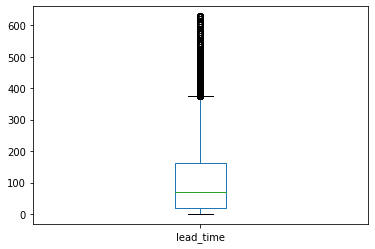

In [355]:
X_test_cde["lead_time"].plot.box()

In [421]:
X_test_cde["lead_time"].quantile(0.99)

444.0

So called target plots, which are just plots based on the data without estimating anything. So you give a variable together with quantiles or grid points and a target variable. Then it counts the occurences of the variable in the specified bins (green bars) and counts the mean of the target variable.

So like a non-parametric partial dependece plot.

We could in the following always plot: Target Plot, PDP, ALE

There is also the actual_plot in the pdpbox, which calcs the M-PLOT

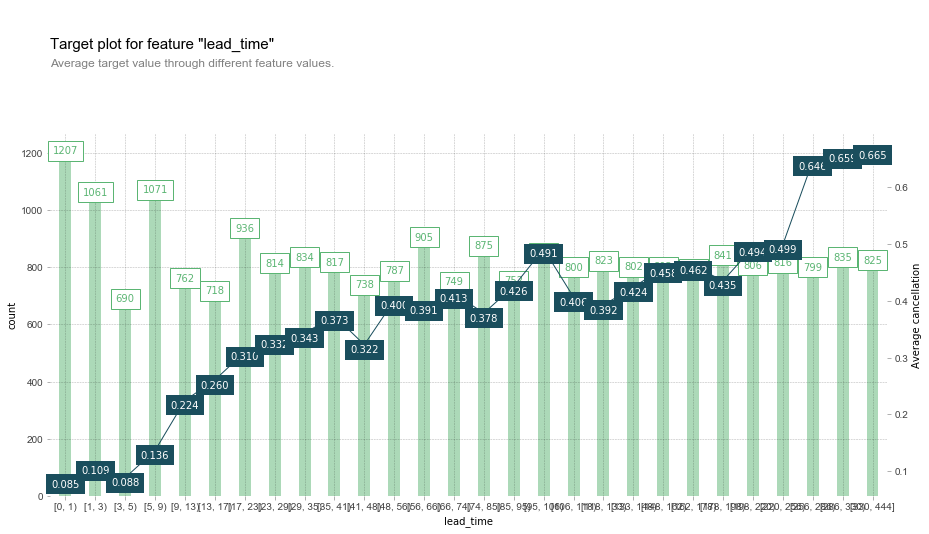

In [435]:
fig, axes, summary = target_plot(test_data, feature="lead_time",feature_name="lead_time",target="cancellation",show_percentile=False,
                                 num_grid_points = 30, percentile_range=(0,99))

In [222]:
np.mean(test_data.loc[(X_test_cde["lead_time"]<13) & (X_test_cde["lead_time"]>=9),"cancellation"])

0.22440944881889763

This is the partial-dependence plot. In the pdpbox package, you have to call pdp_isolate to specify the specifics of estimating the partial dependece plot. Then you receive a pdp_Isolate object which you can use to call pdp_plot where you specify how to plot it. 

For the pdp-plot num_grid_points, grid_type, grid_range/percentile_range, are the parameters, which let you specify for which values to calculate the partial dependece. Probably multiple plots are meaningful, like one over a bigger range, and then one over a more specific smaller range, to get details. For numeric features it is useful to look at the boxplot because for values which barely occured,  the function is not really "trained/penalized" for, thus it might make no sense to take on these values in the pdp. 

The ICE lines can be used to see if there are interactions between the feature and all the others, i.e. if the derivatives of these lines between the knots differ greatly. The plot function provides to either plot a certain ratio of these lines (frac_to_plot) or to cluster them and plot representatives. 

In [214]:
feature_list = X_test_cde.columns

In [503]:
# LEADTIME

pdp_leadTime = pdp_isolate(grad_boost_cde,
                           X_test_cde,
                           model_features=feature_list,
                           feature="lead_time",
                           num_grid_points=30,
                           grid_type="equal",
                           grid_range=(0,300),
                           #percentile_range=(0,99),
                           n_jobs=2)

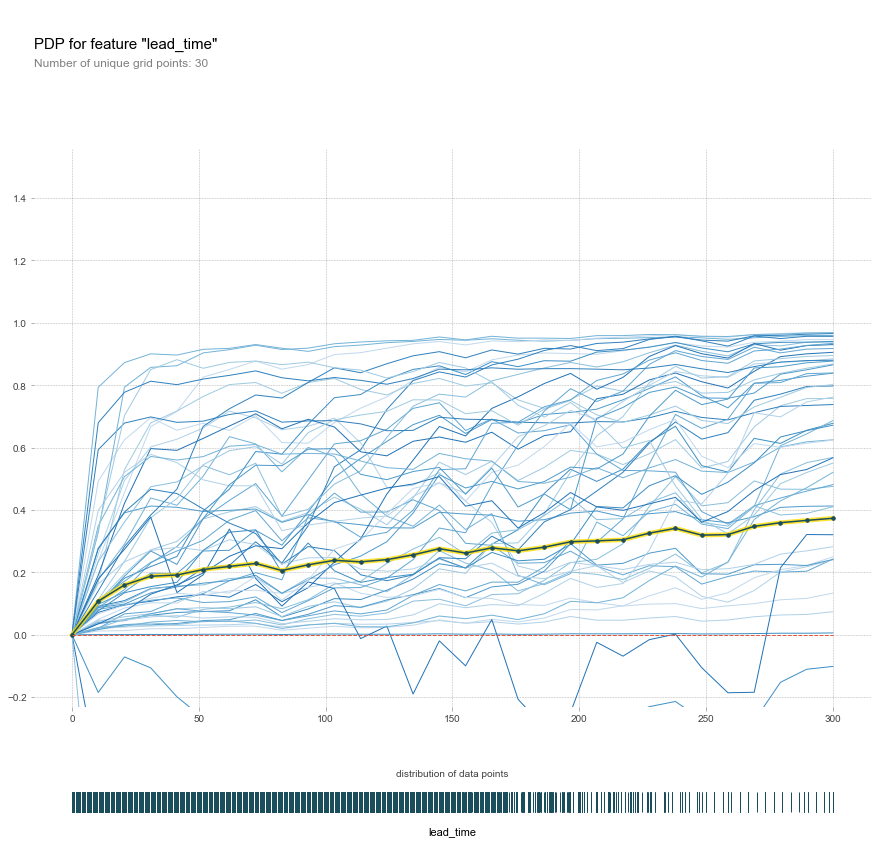

In [534]:
fig, axes = pdp_plot(pdp_leadTime,feature_name="lead_time",center=True,
                     #plot_lines=True, frac_to_plot=0.05,
                     cluster=True, n_cluster_centers=50,
                     plot_pts_dist=True,
                     figsize=(15,15))

We can also access the values individually. This allows us to identify interactions into more detail. E.g. the example with Hotel.

In [504]:
pdp_leadTime.feature_grids

array([  0.        ,  10.34482759,  20.68965517,  31.03448276,
        41.37931034,  51.72413793,  62.06896552,  72.4137931 ,
        82.75862069,  93.10344828, 103.44827586, 113.79310345,
       124.13793103, 134.48275862, 144.82758621, 155.17241379,
       165.51724138, 175.86206897, 186.20689655, 196.55172414,
       206.89655172, 217.24137931, 227.5862069 , 237.93103448,
       248.27586207, 258.62068966, 268.96551724, 279.31034483,
       289.65517241, 300.        ])

In [626]:
ice_leadTime = pdp_leadTime.ice_lines.copy()
ice_leadTime = ice_leadTime.transpose()

In [627]:
groups = X_test_cde["hotel_Resort Hotel"]

In [628]:
groups = np.array(["red" if b else "blue" for b in groups])

In [629]:
n_sample = 1000
ice_draw = ice_leadTime.sample(n=n_sample,axis=1)
groups_draw = groups[ice_draw.columns]

In [630]:
#centering
for i in range(n_sample):
    v1 = ice_draw.iloc[0,i]
    c  = ice_draw.iloc[:,i]-v1
    ice_draw.iloc[:,i] = c

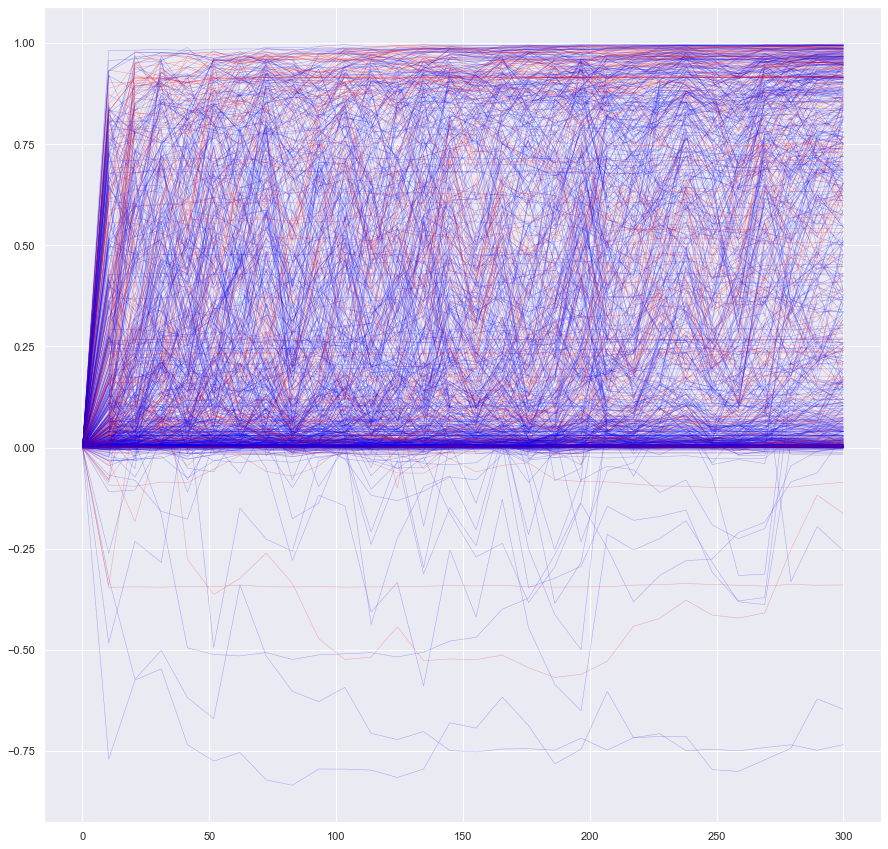

In [631]:
ice_draw.plot.line(linewidth=0.5,color=groups_draw,alpha=0.3,legend=False,figsize=(15,15))

In [439]:
X_sample = X_test_cde[X_test_cde["lead_time"]<300.0]
#which was the 99 quantile

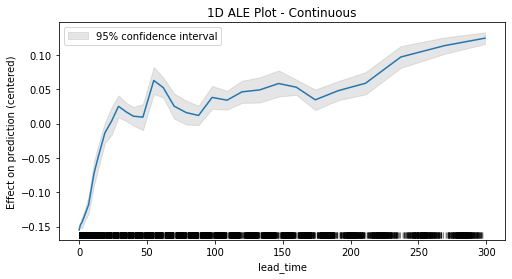

In [442]:
# ALE plot on test data
ale_leadTime = ale(X=X_sample,
                   model=grad_boost_cde,
                   feature=["lead_time"],
                   grid_size=30,
                   feature_type='continuous',
                   include_CI=True)

In [443]:
X_sample_tr = X_train_cde[X_train_cde["lead_time"]<300.0]

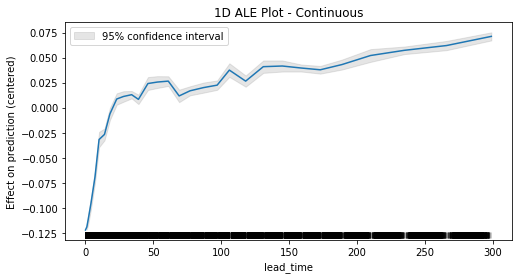

In [444]:
# ALE plot
ale_leadTime = ale(X=X_sample_tr,
                   model=grad_boost_cde,
                   feature=["lead_time"],
                   grid_size=30,
                   feature_type='continuous',
                   include_CI=True)

In [445]:
ale_leadTime

eff    size  lowerCI_95%  upperCI_95%
lead_time                                            
0         -0.122085     0.0          NaN          NaN
1         -0.118958  7675.0    -0.121587    -0.116329
2         -0.111532  1616.0    -0.116375    -0.106689
4         -0.095829  2802.0    -0.101398    -0.090260
7         -0.069143  3410.0    -0.074616    -0.063670
10        -0.031752  2514.0    -0.039416    -0.024089
14        -0.026618  3116.0    -0.032519    -0.020717
18        -0.006143  2784.0    -0.012196    -0.000090
23         0.008720  2893.0     0.003034     0.014406
28         0.011254  2762.0     0.005989     0.016520
34         0.013035  3370.0     0.009355     0.016715
39         0.008369  2572.0     0.003672     0.013066
46         0.024177  3163.0     0.017758     0.030596
53         0.025654  2708.0     0.019771     0.031537
61         0.026583  3231.0     0.021765     0.031400
69         0.011793  2975.0     0.005562     0.018024
77         0.016906  2738.0     0.012380     0.021432
87         0.020121  3110.0     0.015078     0.025165
97         0.022562  2868.0     0.017875     0.027249
106        0.037584  2796.0     0.030806     0.044361
118        0.026577  3089.0     0.020983     0.032170
131        0.041013  2840.0     0.034821     0.047206
145        0.041670  3048.0     0.036135     0.047204
159        0.039655  2978.0     0.036171     0.043139
173        0.037896  2843.0     0.034056     0.041736
189        0.043135  3054.0     0.038165     0.048106
210        0.052150  2884.0     0.045780     0.058521
235        0.057346  2887.0     0.053569     0.061123
266        0.062100  2945.0     0.057490     0.066710
299        0.071259  2948.0     0.067226     0.075292

#### Market Segment

In [237]:
df_nodummy["market_segment"].value_counts()

Online TA        56333
Offline TA/TO    24124
Groups           19785
Direct           12424
Corporate         5099
Complementary      726
Aviation           235
Name: market_segment, dtype: int64

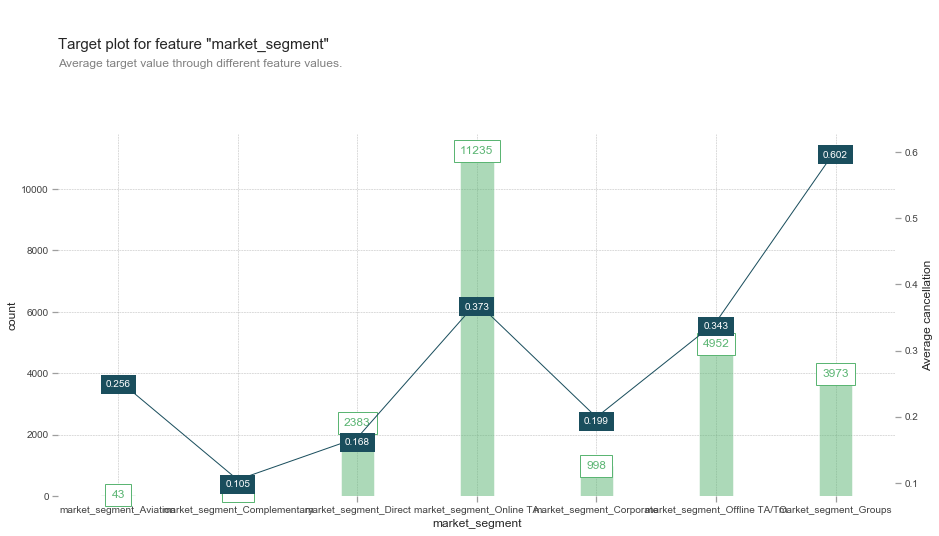

In [665]:
fig, axes, summary = target_plot(test_data, feature=['market_segment_Aviation', 
                                                     'market_segment_Complementary',
                                                     'market_segment_Direct',
                                                     'market_segment_Online TA',
                                                     'market_segment_Corporate', 
                                                     'market_segment_Offline TA/TO',
                                                     'market_segment_Groups'],
                                 feature_name="market_segment",
                                 target="cancellation",
                                 show_percentile=False,
                                )

In [ ]:
# we ignore the category Undefined, as this doesnt occur

# maybe we should change the column names, so that the legend is just more clear

In [666]:
# Market Segment
pdp_market_segment = pdp_isolate(grad_boost_cde,
                                 X_train_cde,
                                 model_features=feature_list,
                                 feature=['market_segment_Aviation', 
                                          'market_segment_Complementary',
                                          'market_segment_Direct',
                                          'market_segment_Online TA',
                                          'market_segment_Corporate', 
                                          'market_segment_Offline TA/TO',
                                          'market_segment_Groups'],
                                 n_jobs=4)

In [667]:
pdp_market_segment.pdp

array([0.30014873, 0.25698875, 0.29791286, 0.37401113, 0.25335765,
       0.24635564, 0.25298915])

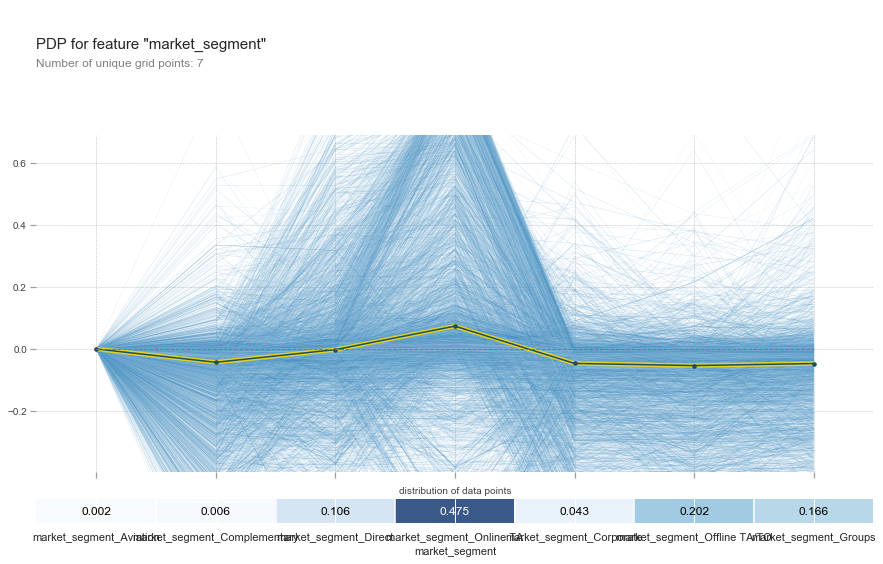

In [668]:
fig, axes = pdp_plot(pdp_market_segment,feature_name="market_segment",center=True,
                     plot_lines=True, frac_to_plot=0.1,
                     #cluster=True, n_cluster_centers=50,
                     plot_pts_dist=True,
                     )

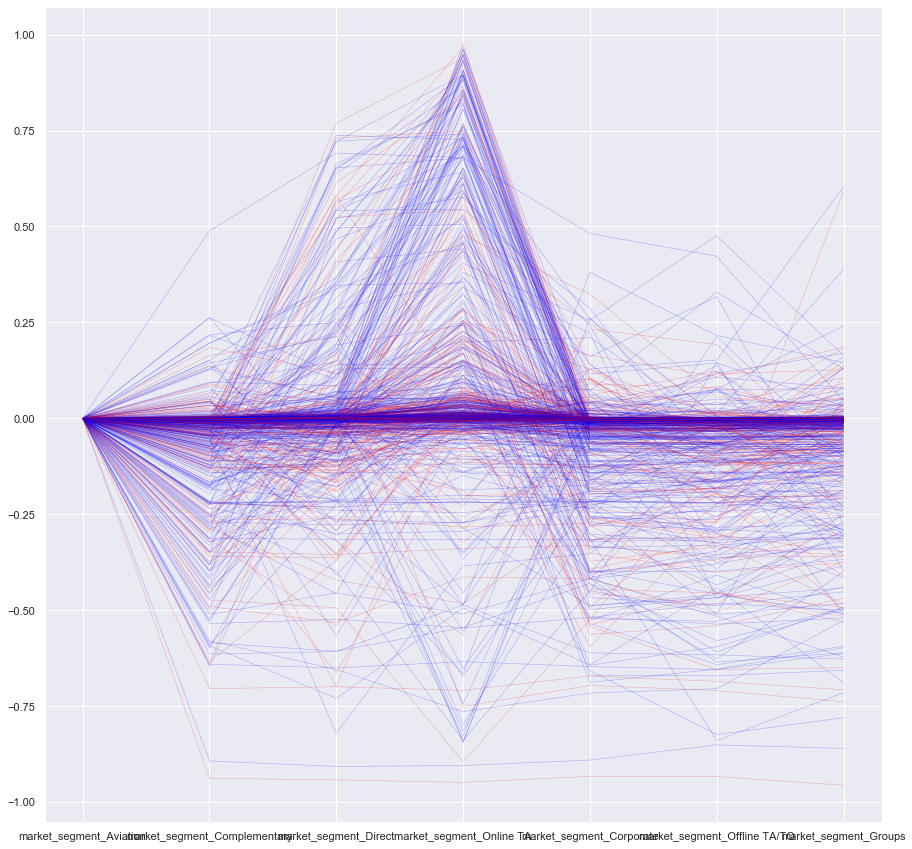

In [669]:
ice_marketseg = pdp_market_segment.ice_lines.copy()
ice_marketseg = ice_marketseg.transpose()

groups = X_train_cde["hotel_Resort Hotel"]
groups = np.array(["red" if b else "blue" for b in groups])

n_sample = 1000
ice_draw = ice_marketseg.sample(n=n_sample,axis=1)
groups_draw = groups[ice_draw.columns]

#centering
for i in range(n_sample):
    v1 = ice_draw.iloc[0,i]
    c  = ice_draw.iloc[:,i]-v1
    ice_draw.iloc[:,i] = c
    
ice_draw.plot.line(linewidth=0.5,color=groups_draw,alpha=0.3,legend=False,figsize=(15,15))

In [661]:
def reverseOneHotEnc(dataset, one_hot_enc_features, categories, feature_name):
    X = dataset.copy()
    # quick check if some one-hot-encoding conditions are given
    code = X[one_hot_enc_features].drop_duplicates()
    n_cats = len(one_hot_enc_features)
    if not n_cats == len(categories):
        return "Error"
    if not code.shape[0]==n_cats:
        return "Error"
    if not sum((code==1).sum(axis=0)==1)==n_cats:
        return "Error"
    if not sum((code==1).sum(axis=1))==n_cats:
        return "Error"
    
    X[feature_name]="XXX"
    i=0
    for f in one_hot_enc_features:
        X.loc[X[f]==1,feature_name]=categories[i]
        i=i+1
    
    X = X.drop(one_hot_enc_features,axis=1)
    X[feature_name] = X[feature_name].astype(dtype="category")
    
    return X

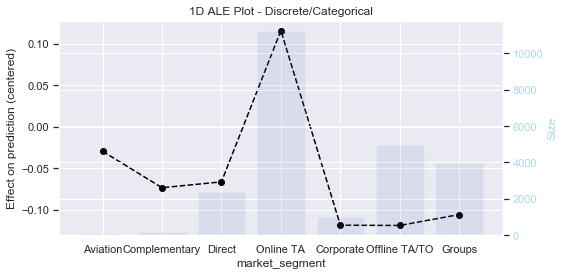

In [682]:
X_test_market_seg = reverseOneHotEnc(X_test_cde,
                                     ['market_segment_Aviation', 
                                      'market_segment_Complementary',
                                      'market_segment_Corporate', 
                                      'market_segment_Direct',
                                      'market_segment_Groups', 
                                      'market_segment_Offline TA/TO',
                                      'market_segment_Online TA'],
                                    ["Aviation","Complementary","Corporate",
                                     "Direct","Groups","Offline TA/TO",
                                     "Online TA"],
                                    "market_segment")

ale_market_segment = ale(X=X_test_market_seg,model=grad_boost_cde,feature=["market_segment"],feature_type='categorical',predictors=feature_list,encode_fun=pd.get_dummies,include_CI=False)

In [ ]:
# calling self implemented version of PDP, the code is little bit 
# further down from here in the notebook

# but can in the following be ignored

In [267]:
market_segment_map = X_test_cde[['market_segment_Aviation', 
                                 'market_segment_Complementary',
                                 'market_segment_Corporate', 
                                 'market_segment_Direct',
                                 'market_segment_Groups', 
                                 'market_segment_Offline TA/TO',
                                 'market_segment_Online TA']].drop_duplicates()

market_segment_map["category"] = ["Online TA","Groups","Offline TA/TO","Direct","Corporate","Complementary","Aviation"]
market_segment_map = market_segment_map.reset_index(drop=True)
market_segment_map

market_segment_Aviation  market_segment_Complementary  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   
5                        0                             1   
6                        1                             0   

   market_segment_Corporate  market_segment_Direct  market_segment_Groups  \
0                         0                      0                      0   
1                         0                      0                      1   
2                         0                      0                      0   
3                         0                      1                      0   
4                         1                      0                      0   
5                         0                      0                      0   
6                         0                      0                      0   

   market_segment_Offline TA/TO  market_segment_Online TA       category  
0                             0                         1      Online TA  
1                             0                         0         Groups  
2                             1                         0  Offline TA/TO  
3                             0                         0         Direct  
4                             0                         0      Corporate  
5                             0                         0  Complementary  
6                             0                         0       Aviation

In [301]:
predict_self = lambda x: grad_boost_cde.predict_proba(x)[:,1]

In [299]:
np.sum(X_test_cde[["market_segment_Aviation"]]==1)

market_segment_Aviation    43
dtype: int64

In [311]:
# probably most interesting one is groups, here conditional instead of marginal is used
pdp_categorical_variable(predict_self, X_test_cde,market_segment_map,"market_segment", conditional=True)

['market_segment_Aviation', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA']


category      mean       std
0      Online TA  0.357679  0.000035
1         Groups  0.606781  0.000120
2  Offline TA/TO  0.335064  0.000091
3         Direct  0.123638  0.000109
4      Corporate  0.173873  0.000343
5  Complementary  0.047301  0.000850
6       Aviation  0.192140  0.007343

#### Deposit Type

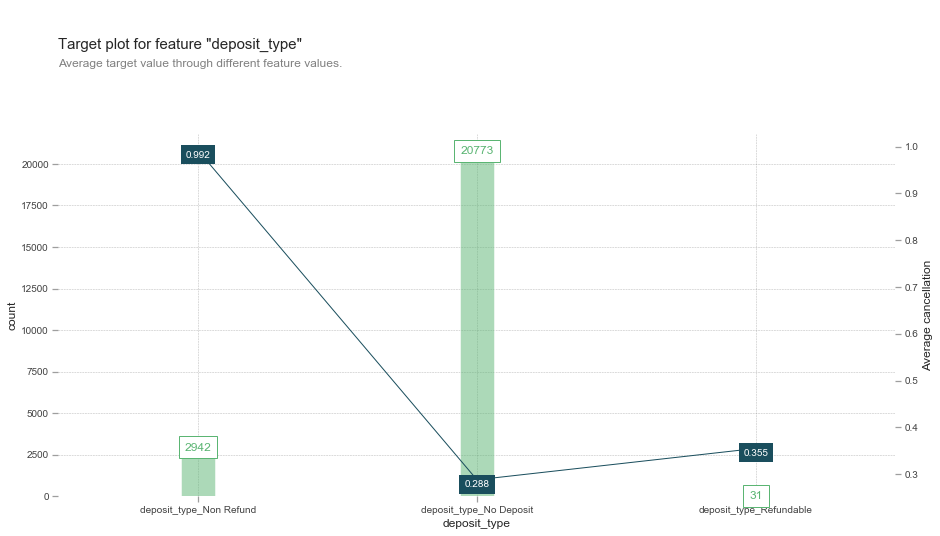

In [681]:
fig, axes, summary = target_plot(test_data, feature=["deposit_type_Non Refund",
                                                     "deposit_type_No Deposit",
                                                     "deposit_type_Refundable"],
                                                     feature_name="deposit_type",
                                                     target="cancellation",
                                                     show_percentile=False,
                                                    )

In [679]:
# Deposit Type
pdp_deposit = pdp_isolate(grad_boost_cde,
                          X_test_cde,
                          model_features=feature_list,
                          feature=["deposit_type_Non Refund",
                                   "deposit_type_No Deposit",
                                   "deposit_type_Refundable"],                          
                          n_jobs=4)

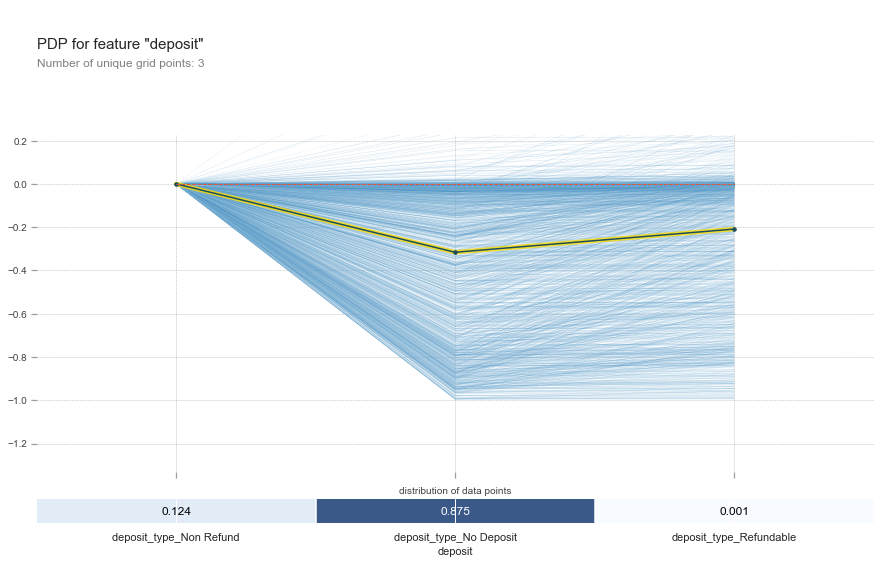

In [680]:
fig, axes = pdp_plot(pdp_deposit,feature_name="deposit",center=True,
                     plot_lines=True, frac_to_plot=0.1,
                     #cluster=True, n_cluster_centers=50,
                     plot_pts_dist=True
                     )

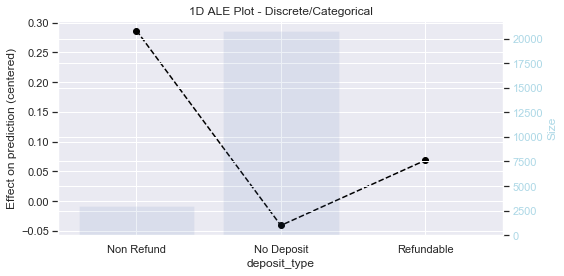

In [678]:
X_test_deposit_type = reverseOneHotEnc(X_test_cde,
                                      ['deposit_type_No Deposit',
                                       'deposit_type_Non Refund',
                                       'deposit_type_Refundable'],
                                      ["No Deposit",
                                       "Non Refund",
                                       "Refundable"],
                                      "deposit_type")

ale_deposit_type = ale(X=X_test_deposit_type,model=grad_boost_cde,feature=["deposit_type"],feature_type='categorical',predictors=feature_list,encode_fun=pd.get_dummies,include_CI=False)

#### Total of Special Requests (Missing ALE)

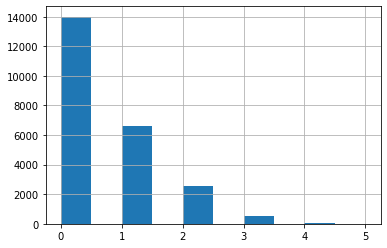

In [398]:
X_test_cde["total_of_special_requests"].hist()

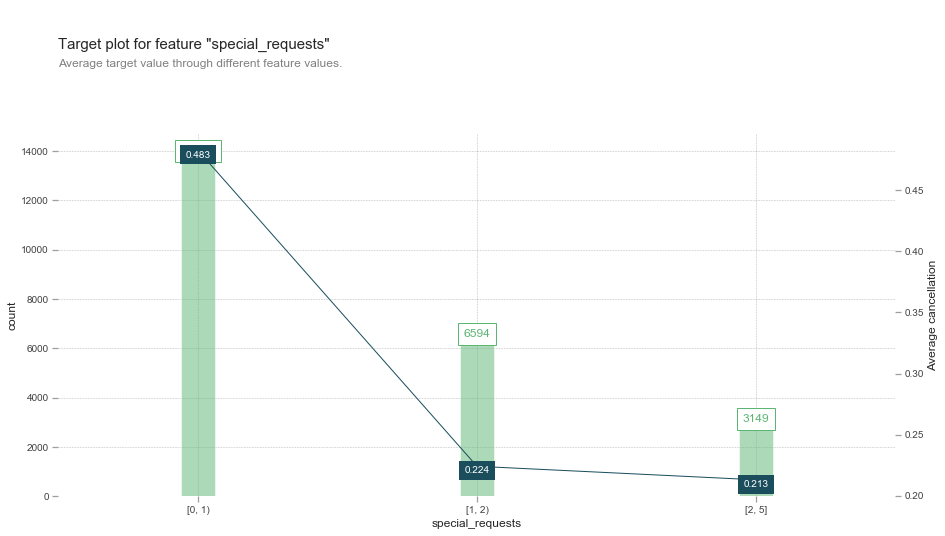

In [700]:
fig, axes, summary = target_plot(test_data, feature="total_of_special_requests",
                                                     feature_name="special_requests",
                                                     target="cancellation",
                                                     show_percentile=False,
                                                    )

I just discovered the actual_plot, provided by the pdpbox, which is actually the M-PLOT.

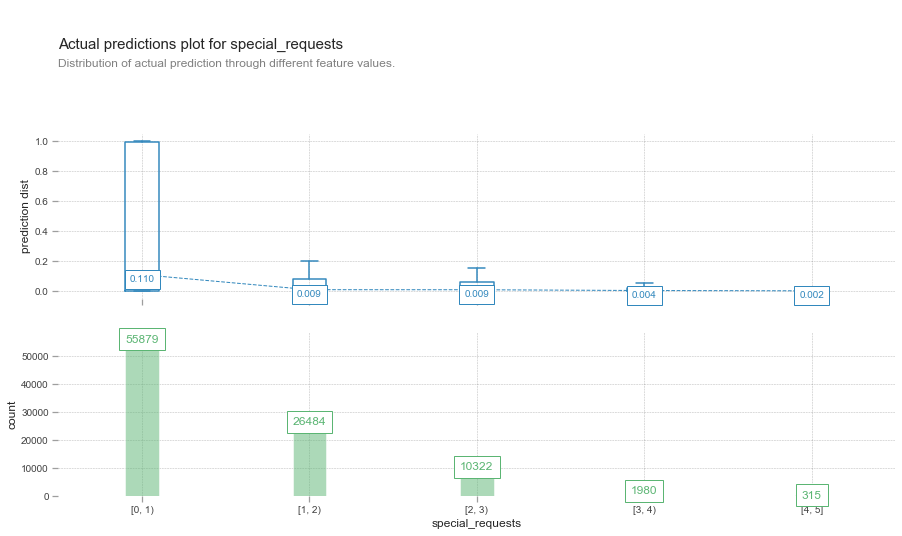

In [697]:
actual_special_requests = actual_plot(grad_boost_cde,
                                      X_train_cde,
                                      feature="total_of_special_requests",
                                      feature_name="special_requests",
                                      cust_grid_points=[0,1,2,3,4,5],
                                      predict_kwds={})

In [698]:
# total of special requests
pdp_special_requests = pdp_isolate(grad_boost_cde,
                                   X_test_cde,
                                   model_features=feature_list,
                                   feature="total_of_special_requests",
                                   cust_grid_points=[0,1,2,3,4,5],
                                   n_jobs=2)

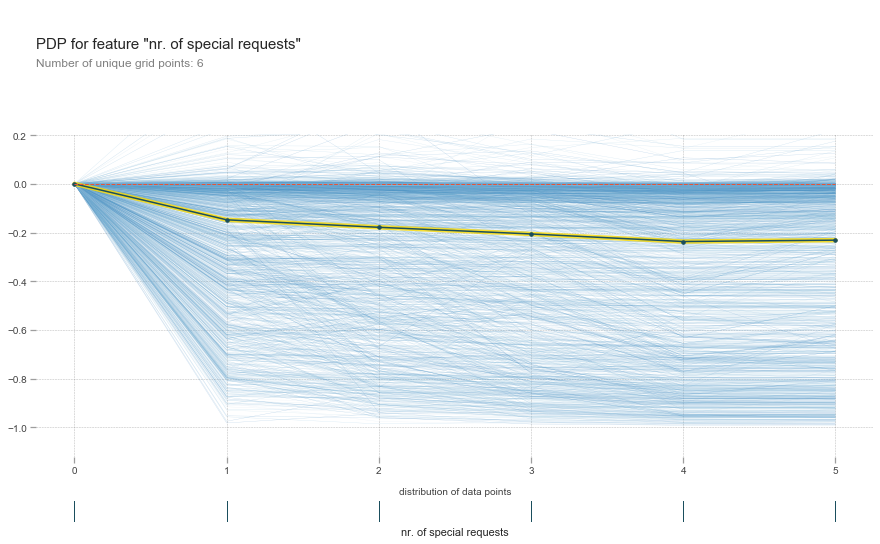

In [701]:
fig, axes = pdp_plot(pdp_special_requests,feature_name="nr. of special requests",center=True,
                     plot_lines=True, frac_to_plot=0.1,
                     #cluster=True, n_cluster_centers=50,
                     plot_pts_dist=True
                     )

#### ADR (missing ALE)

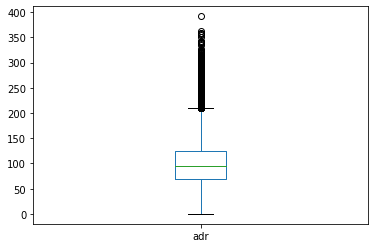

In [407]:
X_test_cde["adr"].plot.box()

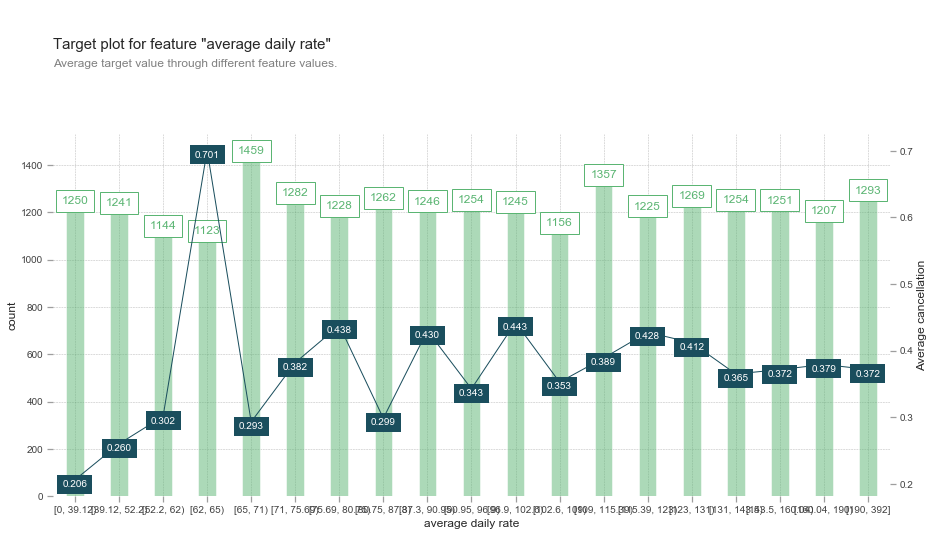

In [703]:
fig, axes, summary = target_plot(test_data, 
                                 feature="adr",
                                 feature_name="average daily rate",
                                 target="cancellation",
                                 num_grid_points=20,
                                 show_percentile=False)

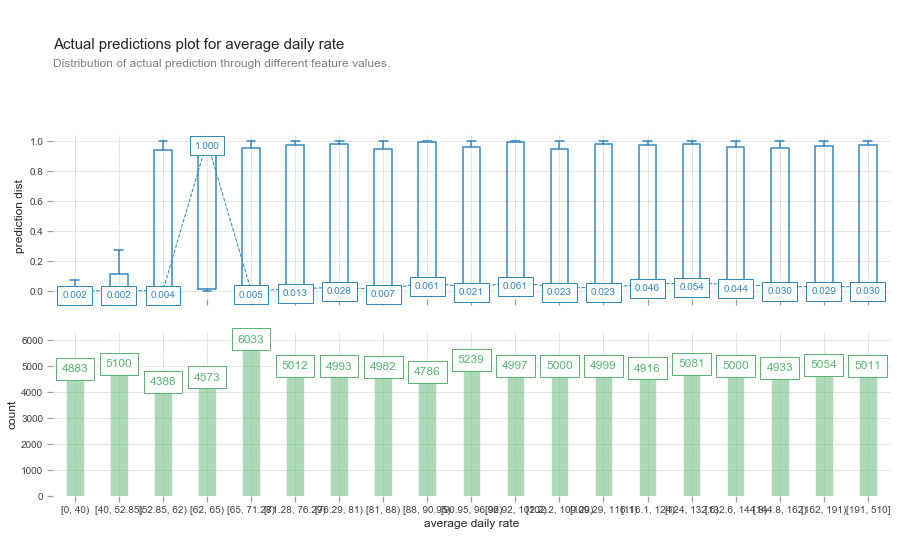

In [704]:
actual_adr = actual_plot(grad_boost_cde,
                         X_train_cde,
                         feature="adr",
                         feature_name="average daily rate",
                         num_grid_points=20,
                         predict_kwds={})

In [705]:
# Average Daily Rate
pdp_adr = pdp_isolate(grad_boost_cde,
                      X_test_cde,
                      model_features=feature_list,
                      feature="adr",
                      num_grid_points = 20,
                      #grid_range=(0,220),
                      #grid_type="equal",
                      #cust_grid_points=[0,1,2,3,4,5],
                      n_jobs=2)

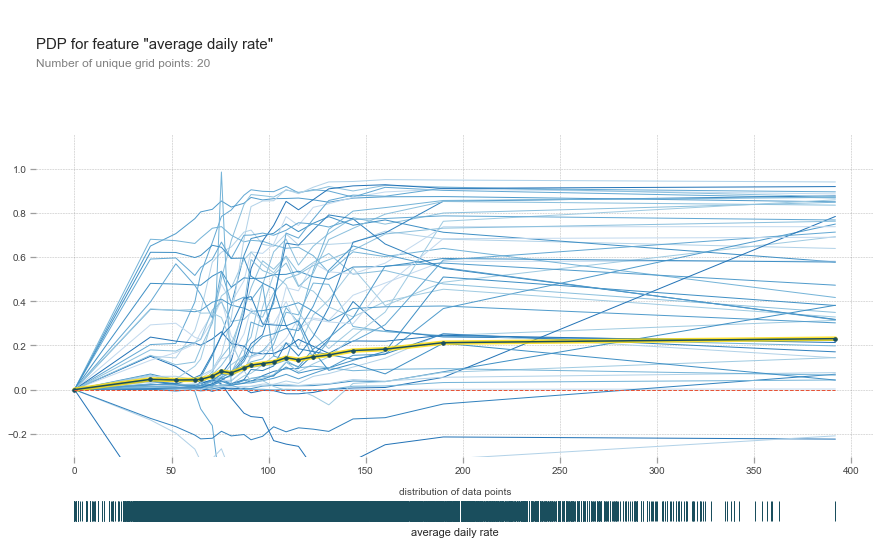

In [706]:
fig, axes = pdp_plot(pdp_adr,feature_name="average daily rate",center=True,
                     #plot_lines=True, frac_to_plot=0.1
                     cluster=True, n_cluster_centers=50,
                     plot_pts_dist=True
                     )

#### Arrival Date Week Number (missing ALE)

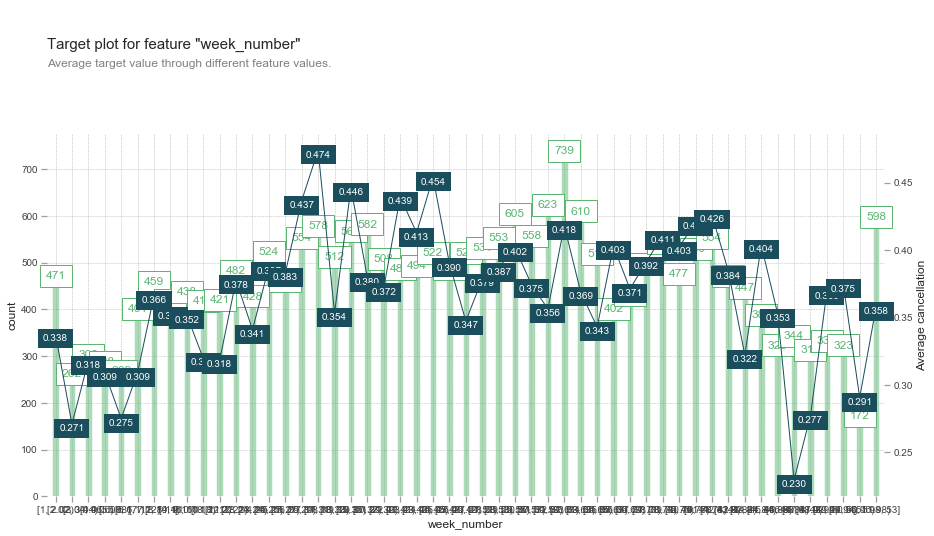

In [717]:
fig, axes, summary = target_plot(test_data, 
                                 feature="arrival_date_week_number",
                                 feature_name="week_number",
                                 target="cancellation",
                                 grid_type="equal",
                                 num_grid_points=52,
                                 show_percentile=False)

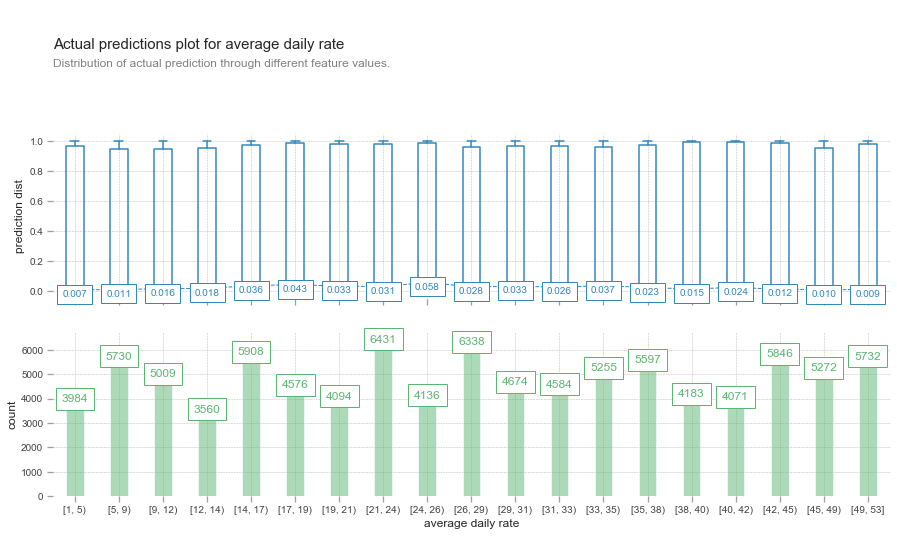

In [719]:
actual_week_nr = actual_plot(grad_boost_cde,
                             X_train_cde,
                             feature="arrival_date_week_number",
                             feature_name="average daily rate",
                             num_grid_points=20,
                             predict_kwds={})

In [720]:
# Week Number
pdp_week_nr = pdp_isolate(grad_boost_cde,
                      X_test_cde,
                      model_features=feature_list,
                      feature="arrival_date_week_number",
                      num_grid_points = 53,
                      #grid_range=(0,220),
                      grid_type="equal",
                      #cust_grid_points=[0,1,2,3,4,5],
                      n_jobs=2)

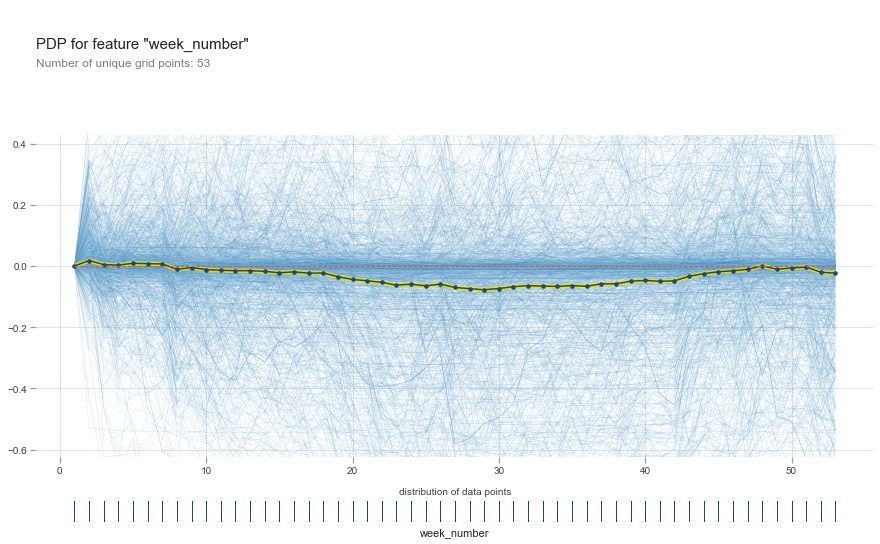

In [722]:
fig, axes = pdp_plot(pdp_week_nr,feature_name="week_number",center=True,
                     plot_lines=True, frac_to_plot=0.1,
                     #cluster=True, n_cluster_centers=50,
                     plot_pts_dist=True
                     )

#### Previous Cancellations

In [370]:
X_test_cde["previous_cancellations"].unique().tolist()

[0, 1, 3, 25, 24, 2, 19, 6, 5, 11, 4, 26, 13, 14]

In [388]:
X_test_cde["previous_cancellations"].value_counts()

0     22420
1      1250
2        21
3        13
24        8
25        6
11        5
14        4
6         4
19        4
26        3
5         3
4         3
13        2
Name: previous_cancellations, dtype: int64

In [389]:
# nr. of previous cancellations
pdp_prev_canceled = pdp_isolate(grad_boost_cde,
                                X_test_cde,
                                model_features=feature_list,
                                feature="previous_cancellations",
                                cust_grid_points=[0,1,2,3,11,24],
                                n_jobs=-1)

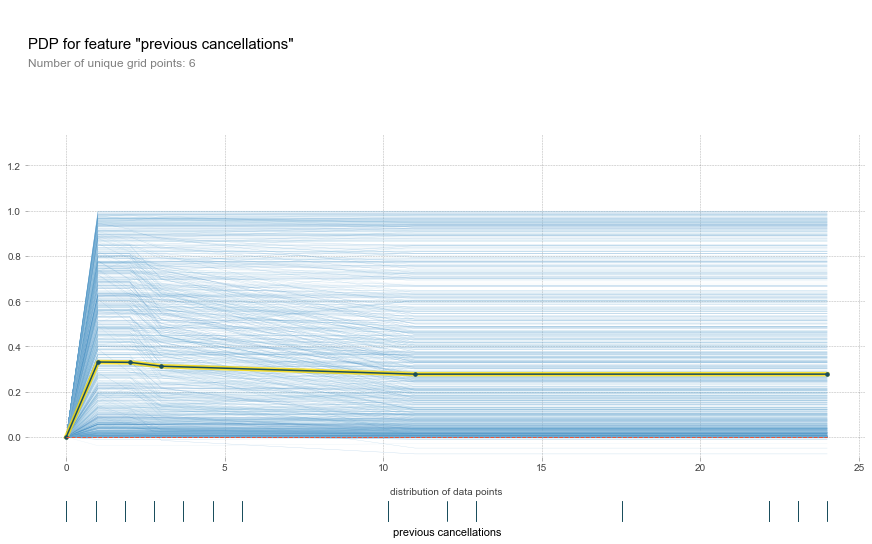

In [390]:
fig, axes = pdp_plot(pdp_prev_canceled, feature_name="previous cancellations",
                     plot_lines=True, frac_to_plot=0.05,
                     plot_pts_dist=True)

In [385]:
# nr. of previous bookings not canceled
pdp_prev_not_canceled = pdp_isolate(grad_boost_cde,
                                    X_test_cde,
                                    model_features=feature_list,
                                    feature="previous_bookings_not_canceled",
                                    cust_grid_points=[0,1,2,3,4,5,6,7,8,9,10],
                                    n_jobs=-1)

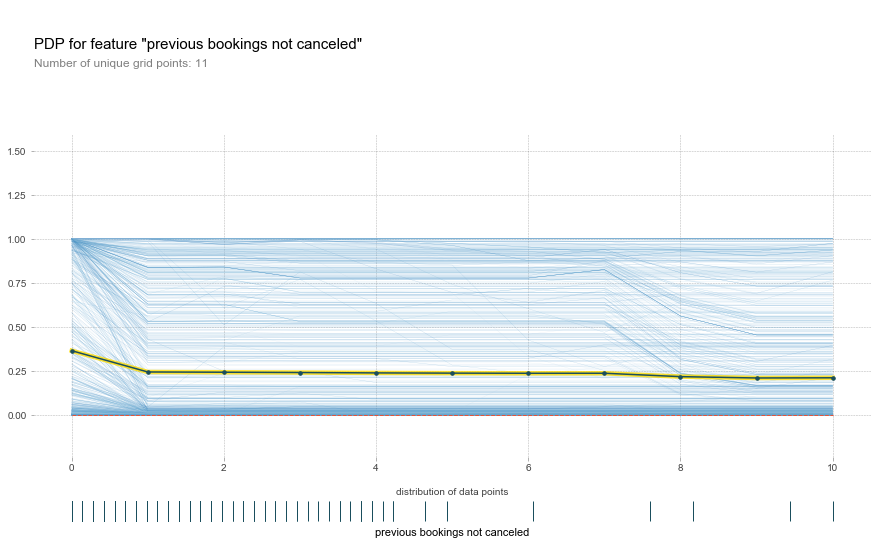

In [395]:
fig, axes = pdp_plot(pdp_prev_not_canceled, feature_name="previous bookings not canceled",
                     plot_lines=True, frac_to_plot=0.05,center=False,
                     plot_pts_dist=True)

Self implementation of partial dependence plot and target plot for categorical variable. This allows to take any encoding of a categorical variable.

In [193]:
def target_categorical_variable(data, df_encoding, feature_name_cat, feature_name_target, conditional = False):
    
    data = data.copy()
    
    cols = df_encoding.columns
    encoding_cols = cols[:-1].tolist()
    
    categories = df_encoding[cols[-1]].values.tolist()
    codes = df_encoding[cols[:-1]]
    
    df_target = pd.DataFrame(np.nan, columns =["category","target_mean","target_std","count"], 
                                     index=pd.Index(list(range(len(categories)))))
        
    c = 0
    for enc in codes.values:
        conditional_target = data.loc[(data[encoding_cols] == enc).all(axis=1).tolist(), feature_name_target]
                
        df_target.iloc[c,:]= [categories[c],np.mean(conditional_target),np.std(conditional_target),len(conditional_target)]
       
        c = c+1
        
    return df_target

In [310]:
def pdp_categorical_variable(prediction_func, data, df_encoding, feature_name, conditional = False):
    
    data = data.copy()
    
    cols = df_encoding.columns.tolist()
    encoding_cols = cols[:-1]
    
    categories = df_encoding[cols[-1]].values.tolist()
    codes = df_encoding[cols[:-1]]
    print(encoding_cols)
    
    if not conditional:
        df_pdp = pd.DataFrame(np.nan, index = pd.Index(list(range(data.shape[0]))),columns=categories)
    else:
        df_pdp = pd.DataFrame(np.nan, index = pd.Index(list(range(len(categories)))),columns=["category","mean","std"])
        
    c = 0
    for enc in codes.values:
        
        if not conditional:
            data.loc[:,encoding_cols] = enc
            predictions = prediction_func(data)
            df_pdp.iloc[:,c]=predictions
            c = c+1
        else:
            data_cond = data.loc[(data[encoding_cols] == enc).all(axis=1).tolist(), :]
            if len(data_cond)==0:
                print(categories[c])
                c = c+1
                continue
            
            predictions = prediction_func(data_cond)
            df_pdp.iloc[c,:]=[categories[c],np.mean(predictions), np.std(predictions)/len(predictions)]
            c = c+1
        
    if not conditional:
        pdp_avg = df_pdp.apply(np.mean,axis=0)
        pdp_std = df_pdp.apply(np.std,axis=0)/data.shape[0]

        pdp = pd.concat([pdp_avg,pdp_std],axis=1,ignore_index=True)

        pdp[feature_name] = pdp.index.tolist()
        pdp.columns = ["mean","std",feature_name]
        pdp = pdp.reset_index(drop=True)

        pdp = pdp[[feature_name,"mean","std"]]

        return pdp
    else:
        return df_pdp

In [98]:
# self implementation requires callable prediction function
predict_gb = lambda x: grad_boost.predict_proba(x)[:,1]

In [158]:
# requires a mapping between the encoding and the encoded category
deposit_type_map = X_test[["deposit_type_Refundable","deposit_type_Non Refund"]].drop_duplicates()
deposit_type_map["category"] = ["No Deposit","Non Refund","Refundable"]
deposit_type_map = deposit_type_map.reset_index(drop=True)
deposit_type_map

deposit_type_Refundable  deposit_type_Non Refund    category
0                        0                        0  No Deposit
1                        0                        1  Non Refund
2                        1                        0  Refundable

In [141]:
deposit_type_map.index.tolist()

[0, 1, 2]

In [154]:
pdp_deposit_type = pdp_categorical_variable(predict_gb, X_test,deposit_type_map,"deposit")

In [157]:
pdp_deposit_type

deposit      mean       std
0  No Deposit  0.347447  0.415661
1  Non Refund  0.666708  0.398476
2  Refundable  0.415593  0.433974

In [203]:
np.mean(df_nodummy.loc[df_nodummy["deposit_type"]=="Non Refund","is_canceled"])

0.9936178973373593

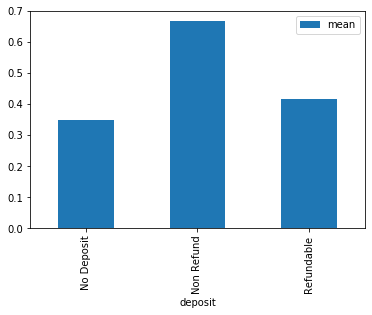

In [155]:
pdp_deposit_type.plot.bar("deposit","mean")

In [194]:
target_categorical_variable(test_data,deposit_type_map,"deposit","cancellation")

category  target_mean  target_std    count
0  No Deposit     0.287777    0.452727  20773.0
1  Non Refund     0.992182    0.088072   2942.0
2  Refundable     0.354839    0.478464     31.0

Just examples. To play around or to pick from.

#### Adults

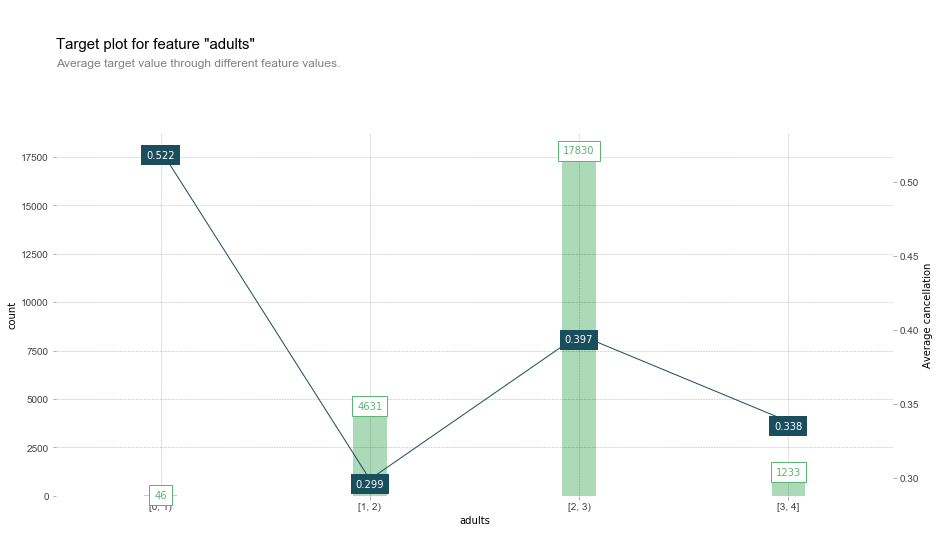

In [74]:
fig, axes, summary = target_plot(test_data, feature="adults",feature_name="adults",target="cancellation",cust_grid_points=[0,1,2,3,4])

In [204]:
pdp_adults = pdp_isolate( rfc,
                          X_test,
                          model_features=features,
                          feature="adults",
                          cust_grid_points=[0,1,2,3,4],
                          n_jobs=4)

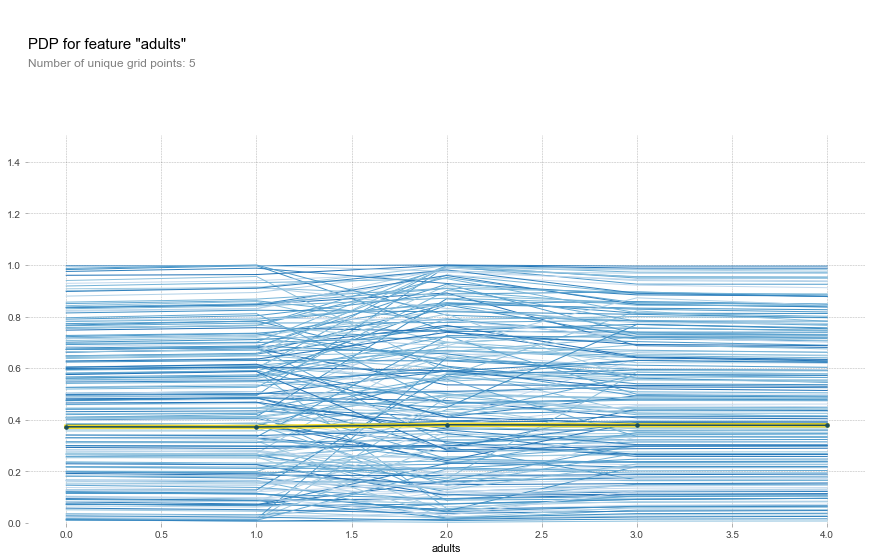

In [205]:
fig, axes = pdp_plot(pdp_adults,feature_name="adults",center=False,
                     #plot_lines=True, frac_to_plot=0.1,
                     cluster=True, n_cluster_centers=200,
                     #show_percentile=True
                     )

In [136]:
X_test["children"].corr(X_test["adults"])

0.025986356683255895

In [142]:
pdp_interact_totalNights_adults = pdp_interact(rfc,
                                              X_test,
                                              model_features = features,
                                              features = ["adults","total_nights"],
                                              num_grid_points=[None,10],
                                              percentile_ranges=[None,(0,98)],
                                              cust_grid_points=[[0,1,2,3,4],None],
                                              n_jobs=-1)

In [304]:
pdp_interact_totalNights_adults.pdp

adults  total_nights     preds
0      0.0           0.0  0.345832
1      0.0           1.0  0.357492
2      0.0           2.0  0.367781
3      0.0           3.0  0.372832
4      0.0           4.0  0.376696
5      0.0           6.0  0.388086
6      0.0          10.0  0.430680
7      1.0           0.0  0.345288
8      1.0           1.0  0.356942
9      1.0           2.0  0.367216
10     1.0           3.0  0.372308
11     1.0           4.0  0.375943
12     1.0           6.0  0.387583
13     1.0          10.0  0.431299
14     2.0           0.0  0.353085
15     2.0           1.0  0.369540
16     2.0           2.0  0.377396
17     2.0           3.0  0.380270
18     2.0           4.0  0.383227
19     2.0           6.0  0.392269
20     2.0          10.0  0.426875
21     3.0           0.0  0.354237
22     3.0           1.0  0.369893
23     3.0           2.0  0.375540
24     3.0           3.0  0.380461
25     3.0           4.0  0.382692
26     3.0           6.0  0.393002
27     3.0          10.0  0.426812
28     4.0           0.0  0.353862
29     4.0           1.0  0.369531
30     4.0           2.0  0.374675
31     4.0           3.0  0.379693
32     4.0           4.0  0.381955
33     4.0           6.0  0.392229
34     4.0          10.0  0.426058

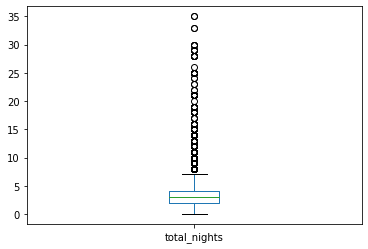

In [145]:
X_test["total_nights"].plot.box()

In [146]:
X_test["total_nights"].quantile(0.98)

10.0

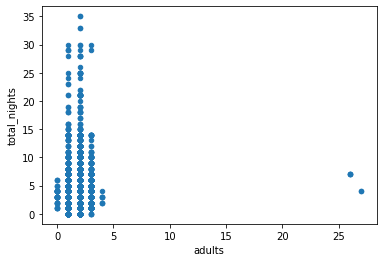

In [149]:
X_test.plot.scatter(x="adults",y="total_nights")

In [155]:
X_test.loc[X_test["adults"]<5,"adults"].corr(X_test["total_nights"])

0.13134891611404673

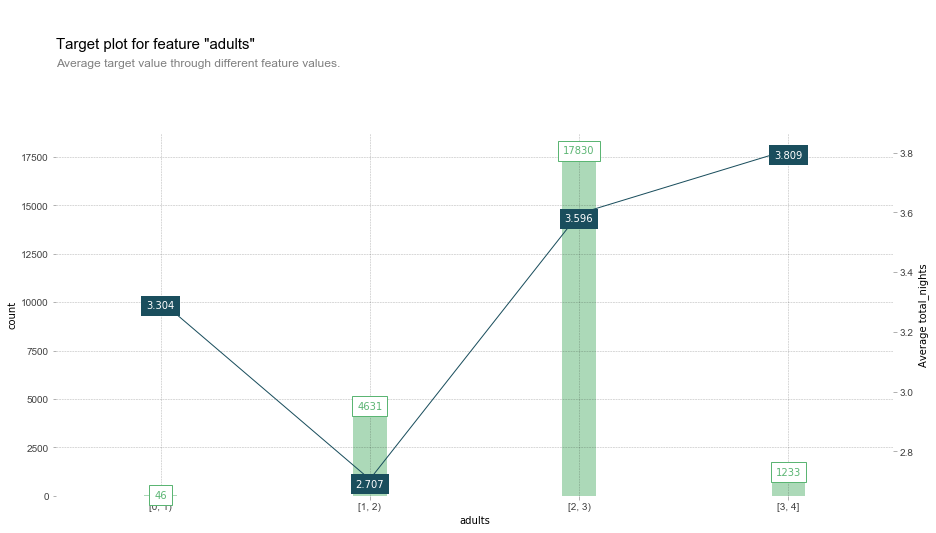

In [160]:
fig, axes, summary = target_plot(test_data,feature="adults",feature_name="adults",target="total_nights",cust_grid_points=[0,1,2,3,4])

#### Interaction Plots

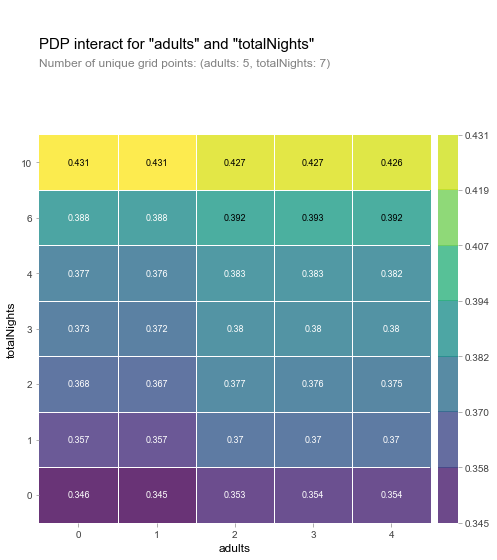

In [157]:
fig, axes = pdp_interact_plot(pdp_interact_totalNights_adults,feature_names=["adults","totalNights"],
                              plot_type="grid")

In [163]:
X_test["previous_cancellations"].value_counts()

0     22420
1      1250
2        21
3        13
24        8
25        6
11        5
14        4
6         4
19        4
26        3
5         3
4         3
13        2
Name: previous_cancellations, dtype: int64

In [185]:
X_test["previous_cancellations"].unique().tolist()

[0, 1, 3, 25, 24, 2, 19, 6, 5, 11, 4, 26, 13, 14]

In [165]:
X_test["previous_bookings_not_canceled"].value_counts()

0     23073
1       269
2       107
3        62
4        47
5        33
6        24
7        17
8        13
11       12
9        10
12       10
10        9
14        7
13        6
16        5
27        4
17        4
28        4
25        3
18        3
19        3
20        3
21        2
30        2
15        2
43        1
22        1
54        1
67        1
35        1
23        1
71        1
29        1
33        1
24        1
26        1
58        1
Name: previous_bookings_not_canceled, dtype: int64

In [193]:
X_test["previous_cancellations"].corr(X_test["previous_bookings_not_canceled"])

0.14881477284083847

In [197]:
pdp_interact_prevCancellations = pdp_interact(rfc,
                                              X_test,
                                              model_features = features,
                                              features = ["previous_bookings_not_canceled","previous_cancellations"],
                                              #num_grid_points=[None,10],
                                              #grid_types=[None,"equal"],
                                              #percentile_ranges=[None,(0,98)],
                                              cust_grid_points=[[0,1,2,3,4,5],[0,1,2,3,24,25]],
                                              n_jobs=-1)

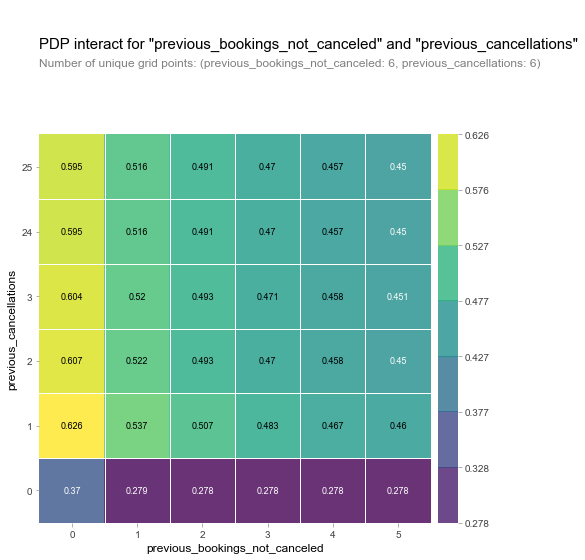

In [198]:
fig, axes = pdp_interact_plot(pdp_interact_prevCancellations,feature_names=["previous_bookings_not_canceled","previous_cancellations"],
                              plot_type="grid")

In [196]:
pd.crosstab(X_test["previous_bookings_not_canceled"],X_test["previous_cancellations"])

previous_cancellations             0     1   2   3   4   5   6   11  13  14  \
previous_bookings_not_canceled                                                
0                               21869  1172   5   0   0   0   1   0   1   4   
1                                 257     8   3   0   0   0   0   0   1   0   
2                                  99     6   1   1   0   0   0   0   0   0   
3                                  53     8   1   0   0   0   0   0   0   0   
4                                  37     4   2   2   0   0   0   2   0   0   
5                                  26     7   0   0   0   0   0   0   0   0   
6                                  14     9   1   0   0   0   0   0   0   0   
7                                  12     3   1   1   0   0   0   0   0   0   
8                                   9     3   1   0   0   0   0   0   0   0   
9                                   6     4   0   0   0   0   0   0   0   0   
10                                  7     1   1   0   0   0   0   0   0   0   
11                                  8     3   1   0   0   0   0   0   0   0   
12                                  7     0   1   2   0   0   0   0   0   0   
13                                  2     4   0   0   0   0   0   0   0   0   
14                                  4     3   0   0   0   0   0   0   0   0   
15                                  1     0   0   1   0   0   0   0   0   0   
16                                  0     3   1   1   0   0   0   0   0   0   
17                                  0     2   0   0   2   0   0   0   0   0   
18                                  1     2   0   0   0   0   0   0   0   0   
19                                  1     1   0   0   0   1   0   0   0   0   
20                                  1     0   0   0   1   1   0   0   0   0   
21                                  2     0   0   0   0   0   0   0   0   0   
22                                  0     0   0   0   0   0   0   1   0   0   
23                                  0     1   0   0   0   0   0   0   0   0   
24                                  0     0   0   1   0   0   0   0   0   0   
25                                  1     0   0   0   0   0   0   2   0   0   
26                                  0     0   1   0   0   0   0   0   0   0   
27                                  1     2   1   0   0   0   0   0   0   0   
28                                  1     3   0   0   0   0   0   0   0   0   
29                                  1     0   0   0   0   0   0   0   0   0   
30                                  0     1   0   1   0   0   0   0   0   0   
33                                  0     0   0   1   0   0   0   0   0   0   
35                                  0     0   0   1   0   0   0   0   0   0   
43                                  0     0   0   1   0   0   0   0   0   0   
54                                  0     0   0   0   0   1   0   0   0   0   
58                                  0     0   0   0   0   0   1   0   0   0   
67                                  0     0   0   0   0   0   1   0   0   0   
71                                  0     0   0   0   0   0   1   0   0   0   

previous_cancellations          19  24  25  26  
previous_bookings_not_canceled                  
0                                4   8   6   3  
1                                0   0   0   0  
2                                0   0   0   0  
3                                0   0   0   0  
4                                0   0   0   0  
5                                0   0   0   0  
6                                0   0   0   0  
7                                0   0   0   0  
8                                0   0   0   0  
9                                0   0   0   0  
10                               0   0   0   0  
11                               0   0   0   0  
12                               0   0   0   0  
13                               0   0   0   0  
14                               0   0   0   0  
15    

### SHAP

#### TreeSHAP

In [ ]:
#########
# Special estimation algorithm of SHAPLEY values for tree based models
#########
# Alibi provides two methods: by Interventional Feature Perturbation, by Path Dependent Feature Perturbation

In [ ]:
# Interventional Feature Perturbation

In [8]:
from alibi.explainers import TreeShap

In [16]:
df_nodummy = pd.read_csv("Datasets/dataset_correctedCountry_includedADR0_included0Nights_NoCATEncoding.csv")


from sklearn.model_selection import train_test_split

labels = df_nodummy.iloc[:,0]
features = df_nodummy.iloc[:,1:]

X_train_nde, X_test_nde, y_train_nde, y_test_nde = train_test_split(features, labels, test_size = 0.2, random_state = 0)
print(X_train_nde.shape,X_test_nde.shape, y_train_nde.shape, y_test_nde.shape)

(94980, 23) (23746, 23) (94980,) (23746,)


In [338]:
predict_logOdds = lambda x:rfc.predict_log_proba(x)

In [9]:
pd.set_option('display.max_rows', 500)
pd.DataFrame(X_train.columns)

0
0                        lead_time
1         arrival_date_week_number
2        arrival_date_day_of_month
3                           adults
4                         children
5                           babies
6           previous_cancellations
7   previous_bookings_not_canceled
8                  booking_changes
9             days_in_waiting_list
10                             adr
11     required_car_parking_spaces
12       total_of_special_requests
13                hotel_City Hotel
14              hotel_Resort Hotel
15                         meal_BB
16                         meal_FB
17                         meal_HB
18                         meal_SC
19                  meal_Undefined
20                     country_AGO
21                     country_ARG
22                     country_AUS
23                     country_AUT
24                     country_BEL
25                     country_BRA
26                     country_CHE
27                     country_CHN
28                      country_CN
29                     country_DEU
30                     country_DNK
31                     country_ESP
32                     country_FIN
33                     country_FRA
34                     country_GBR
35                     country_HUN
36                     country_IRL
37                     country_ISR
38                     country_ITA
39                     country_LUX
40                     country_MAR
41                     country_NLD
42                     country_NOR
43                   country_OTHER
44                     country_POL
45                     country_PRT
46                     country_ROU
47                     country_RUS
48                     country_SWE
49                     country_TUR
50                     country_USA
51         market_segment_Aviation
52    market_segment_Complementary
53        market_segment_Corporate
54           market_segment_Direct
55           market_segment_Groups
56    market_segment_Offline TA/TO
57        market_segment_Online TA
58        market_segment_Undefined
59            reserved_room_type_A
60            reserved_room_type_B
61            reserved_room_type_C
62            reserved_room_type_D
63            reserved_room_type_E
64            reserved_room_type_F
65            reserved_room_type_G
66            reserved_room_type_H
67            reserved_room_type_L
68            reserved_room_type_P
69            assigned_room_type_A
70            assigned_room_type_B
71            assigned_room_type_C
72            assigned_room_type_D
73            assigned_room_type_E
74            assigned_room_type_F
75            assigned_room_type_G
76            assigned_room_type_H
77            assigned_room_type_I
78            assigned_room_type_K
79            assigned_room_type_L
80            assigned_room_type_P
81         deposit_type_No Deposit
82         deposit_type_Non Refund
83         deposit_type_Refundable
84          customer_type_Contract
85             customer_type_Group
86         customer_type_Transient
87   customer_type_Transient-Party
88                    total_nights

In [374]:
class RFC():
    def __init__(self,model):
        self.model = model
    def predict(self,x):
        p = self.model.predict_proba(x)[:,1]
        return np.log(p/(1-p))

In [422]:
l = [1]
l.extend([2,3])
l

[1, 2, 3]

In [17]:
feature_names = X_train.columns.tolist()[0:13]
feature_names.extend(['hotel','meal','country','market_segment','reserved_room_type',
                                      'assigned_room_type','deposit_type','customer_type'])
feature_names.append("total_nights")

In [18]:
category_map={
    13:["City Hotel","Resort Hotel"],
    14:["BB","FB","HB","SC","Undefined"],
    15:df_nodummy["country"].unique().tolist(),
    16:df_nodummy["market_segment"].unique().tolist(),
    17:df_nodummy["reserved_room_type"].unique().tolist(),
    18:df_nodummy["assigned_room_type"].unique().tolist(),
    19:df_nodummy["deposit_type"].unique().tolist(),
    20:df_nodummy["customer_type"].unique().tolist()    
}

In [424]:
len(feature_names)

22

In [10]:
X_train_randomSample = X_train.sample(1000,random_state=0)

In [19]:
tree_shap_path_dependent = TreeShap(rfc,
                                    model_output="raw",
                                    task="classification",
                                    feature_names = feature_names,
                                    categorical_names = category_map)

#tree_shap_path_dependent.fit(X_train_randomSample)
tree_shap_path_dependent.fit()

TreeShap(meta={
  'name': 'TreeShap',
  'type': ['whitebox'],
  'task': 'classification',
  'explanations': ['local', 'global'],
  'params': {
              'model_output': 'raw',
              'summarise_background': False,
              'summarise_result': None,
              'approximate': None,
              'interactions': None,
              'explain_loss': None,
              'algorithm': 'tree_path_dependent',
              'kwargs': {}}
            }
)

In [ ]:
tree_shap_explanations = tree_shap_path_dependent.explain(X_test.iloc[0:1000,:],
                                                          summarise_result=True,
                                                          cat_vars_start_idx=[13,15,20,51,59,69,81,84],
                                                          cat_vars_enc_dim=[2,5,31,8,10,12,3,4])

In [456]:
pp = rfc.predict_proba(X_train)

In [457]:
pp.mean(0)

array([0.62909033, 0.37090967])

In [455]:
tree_shap_explanations.expected_value

array([0.600776, 0.399224])

In [462]:
tree_shap_explanations.raw["raw_prediction"]

array([[0.68578333, 0.31421667]])

In [444]:
tree_shap_explanations.shap_values[0].sum(2)

AxisError: axis 2 is out of bounds for array of dimension 2